## Iris Flowers Classification

#### Problem statement - The iris flowers have different species and you can distinguish them based on the length of petals and sepals.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(len(df))
df.columns

150


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

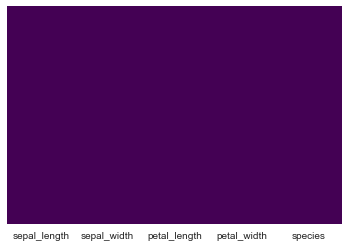

In [23]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

C:\Users\NIKHIL HIRAGOND\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

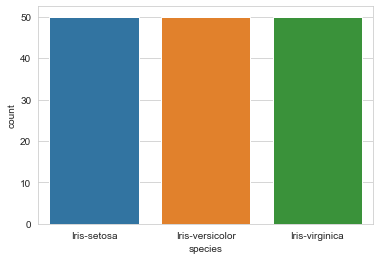

In [24]:
sns.set_style('whitegrid')
sns.countplot('species', data=df)

### Analyze dependent and independent features
##### independent = 'sepal_length, sepal_width, petal_length, petal_width'
##### dependent = 'species'

### Box plot

<AxesSubplot:>

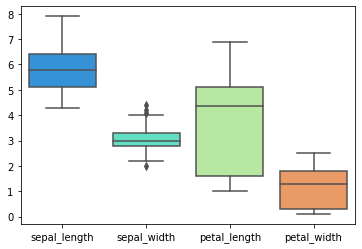

In [5]:
sns.boxplot(data=df, palette='rainbow')

<AxesSubplot:ylabel='sepal_width'>

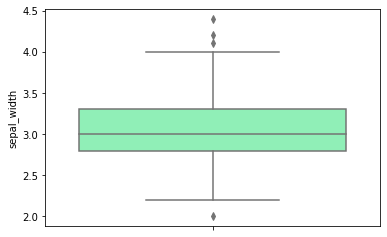

In [6]:
sns.boxplot(y='sepal_width', data=df, palette='rainbow')

#### From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.

### Lets check relation between features

#### First will check univariet (Single variable relationship)

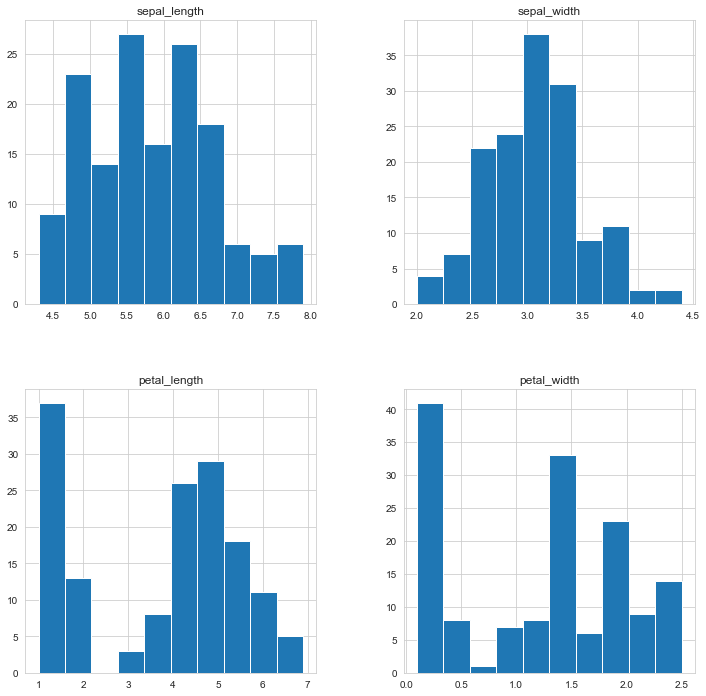

In [19]:
df.hist(figsize=(12,12))
plt.show()

#### Relation between more than one variable

In [7]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

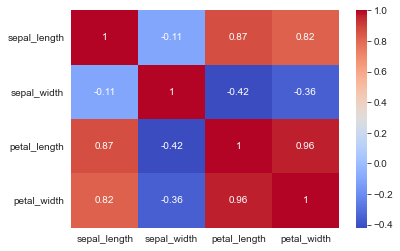

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

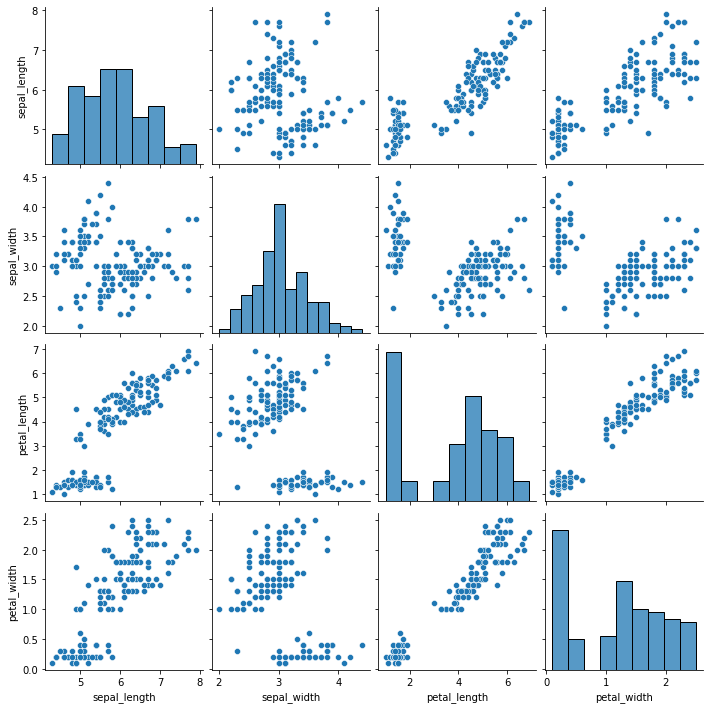

In [9]:
sns.pairplot(df)

* independent variable petal_length and petal_width are positively and strongly correlated to sepal_length.
* independent variable sepal_width is negatively and weakly correlated to sepal_length.

#### Scatterplot b/w sepal_length, sepal_width, petal_width, petal_length and how species are reacting to it.

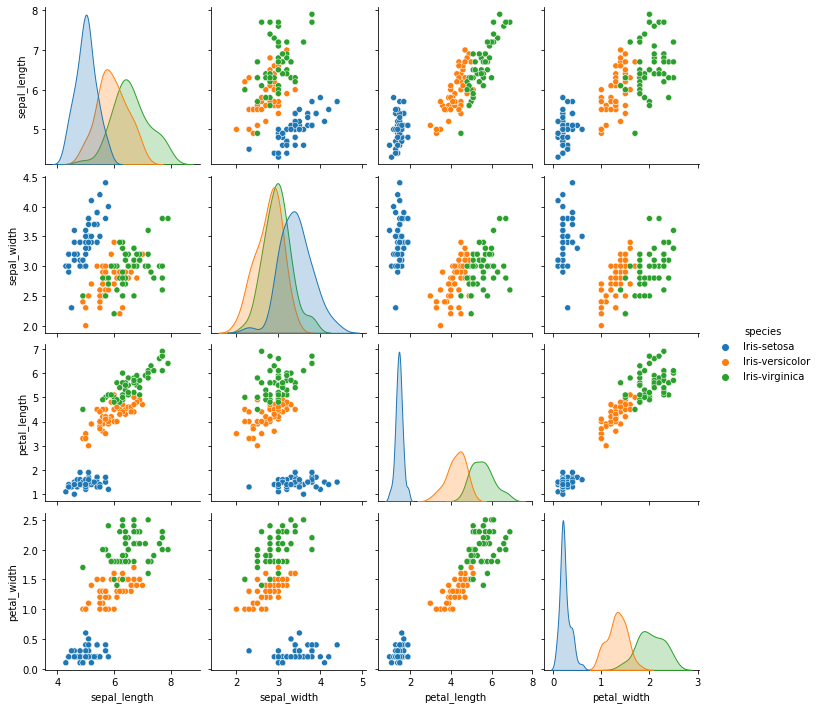

In [10]:
sns.pairplot(df,hue="species")

#### Here we can see that petal_length and petal_width are strongly and positively correlated. So lets check categorical plot with species

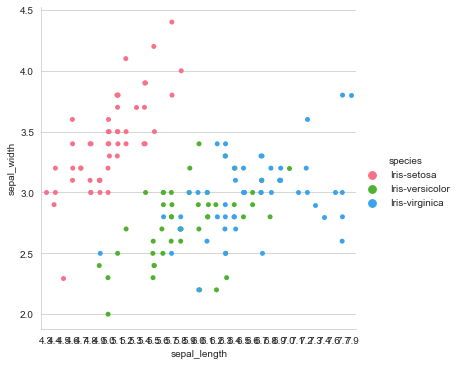

In [33]:
sns.catplot(x='sepal_length', y='sepal_width', palette='husl', hue='species', data=df)

#### Here we are not able to classify as vericolor and virginica are overlapped

### Lets check with petal_length and petal_width

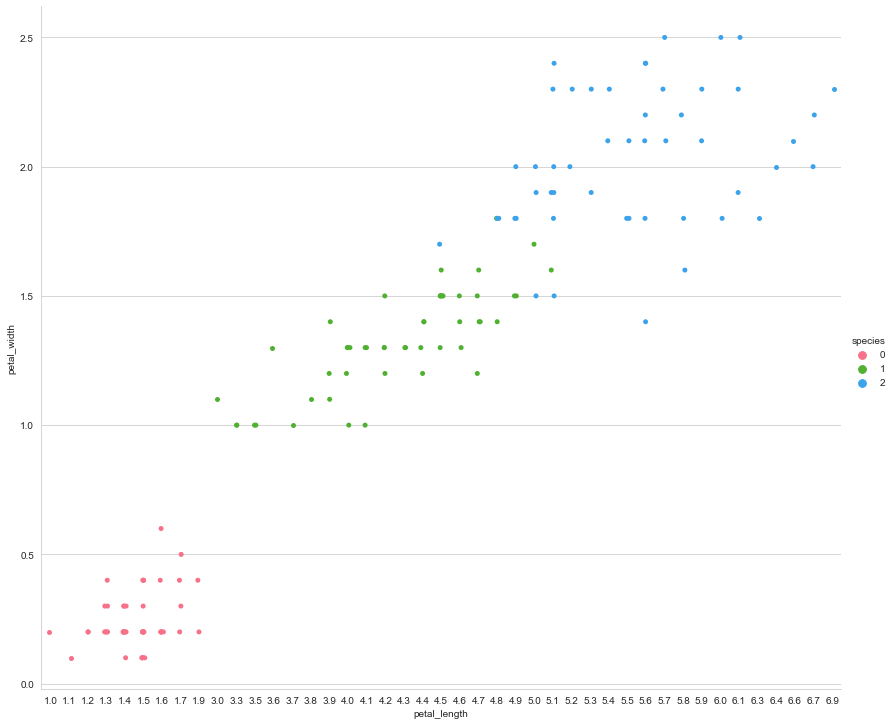

In [42]:
sns.catplot(x='petal_length', y='petal_width', palette='husl', hue='species',height=10, aspect=11.7/10, data=df)

#### Simple algorithm can be categories as 
#### If petal length is between 1 - 2 and petal width is less than 1  ==> Iris-setosa
#### If petal length is apprx.  between 3 - 5 and petal width is between 1 - 1.5  ==> Iris-vericolor
#### If petal length is apprx. between 6 - 8 and petal width is grater than 1.5  ==> Iris-verginica

### LabelEncoder
#### Label encoding refers to converting the lables into numeric so as to convert it to machine readable form 

In [37]:
le = LabelEncoder()

In [40]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [44]:
from sklearn.model_selection import train_test_split
# Train - 70% 
# Test - 30% 

In [75]:
input_df = df.drop(columns=['species'])
output_df = df['species']
output_df.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [77]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.30)

### Logistic Regression (classification algorithm)

In [78]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [79]:
model.fit(x_train, y_train)

LogisticRegression()

In [80]:
print(f'Logistic Regression Accuracy : {model.score(x_test, y_test) * 100}')

Logistic Regression Accuracy : 97.77777777777777


### k-nearest neighbors  (classification algorithm)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier()

In [82]:
k_model.fit(x_train, y_train)

KNeighborsClassifier()

In [83]:
print(f'k-nearest neighbors Accuracy : {k_model.score(x_test, y_test) * 100}')

k-nearest neighbors Accuracy : 95.55555555555556


### Decision Tree (classification algorithm)

In [84]:
from sklearn.tree import DecisionTreeClassifier
d_model = DecisionTreeClassifier() 

In [85]:
d_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
print(f'Decision Tree Accuracy : {d_model.score(x_test, y_test) * 100}')

Decision Tree Accuracy : 97.77777777777777
